In [1]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader
from helpers import helpers, plotter
from keras.callbacks import ModelCheckpoint
from inference import infer
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf; import keras

Using TensorFlow backend.


In [60]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_2D
rbf_2D


In [61]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', diff_x= True, noise = True, d = True)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


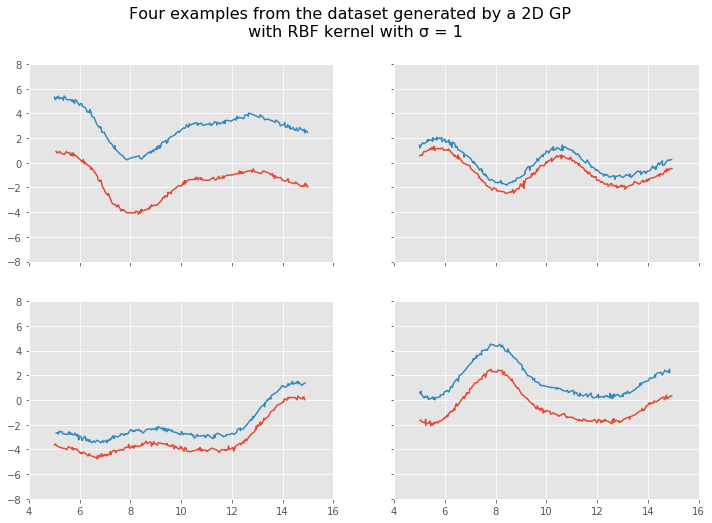

In [62]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [50]:
run = 1
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [51]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [56]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 50; order = False
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = context, d = d); 

In [57]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads); 

In [58]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

0.23252706142019472

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0.23946418313251114
0.24405512522837347
0.23425360250800298
0.23777493517065262
0.2377960596832766
0.23960998150324908
0.2397658573987442
0.23837675918112672
0.2336090837879746
0.23334339289296713
0.24099429112304555
0.23588436896988754
0.2381968416572536
0.23686294454995216
0.23554343518151233
0.23725190636529853
0.2426647570615789
0.23564234639675408
0.23183224285551937
0.23651577837923835
0.24273742471593618
0.23947283872512154
0.23930630403278919
0.2365419160762684
0.237078554801

0.2359272897794328
0.23812563806994144
0.23377940043014836
0.2348713743587249
0.23907307943862263
0.23857234485368958
0.22872662785049538
0.23982988814725498
0.23380463081637193
0.23526599043788174
0.239169099694224
0.23920931973300044
0.2330505374877012
0.23688055934719793
0.23590881679060804
0.23261058360316783
0.2393307094133456
0.23684391418029316
0.23438985444271832
0.23970988551237637
0.24227953725032061
0.2401987281408397
0.2413474931975709
0.24014179310535425
0.24168978401504407
0.24148804063078017
0.23854073657402877
0.23257028358356946
0.23808435184094048
0.2353635440693114
0.2357679101037082
0.23880925162857566
0.2414742998383649
0.232609785211671
0.23305180027373487
0.23583782665022898
0.23526808770754895
0.23366646377836864
0.23786363365144317
0.24293277301951963
0.23919180910588228
0.23171040828656783
0.23279920743686033
0.22125316493581018
0.2360631606254025
0.23681099250805032
0.24136542425770643
0.23686345389409466
0.23834471631163945
0.23738923371113793
0.237409496570

0.23368905689522354
0.2316789106846067
0.23514362942423697
0.23393873977816762
0.23554967520669576
0.2416263166931248
0.2373660382876666
0.2336353539267077
0.23875297200343734
0.23185058560161195
0.2326964805665102
0.2369493608763684
0.23593270875361896
0.23816219683191592
0.23264711024567306
0.23504582608248678
0.2371837783321197
0.23360099114026947
0.23790173910401727
0.2347066156909596
0.237272930558876
0.2390685079641552
0.22665681974866292
0.23843421824685415
0.2363294369423675
0.23365595830525138
0.23267901311554465
0.23464507681382604
0.23240108407807156
0.23745894519199445
0.23806614289102754
0.23580439302291936
0.236014925374606
0.23726774687408478
0.23504387640406973
0.23833204128553406
0.23261157765065402
0.23287729591875564
0.23814078808687345
0.24081085675636468
0.22650902477996232
0.23954147667523437
0.23230766035145547
0.23308206251754682
0.2389170123648316
0.23768773761940662
0.23355027891533287
0.2365163655280683
0.2392156194910714
0.23023259270593635
0.237535413661114

0.2368674500844306
0.2428838141902561
0.23532490940231027
0.23141617513092888
0.23682647575717222
0.2427336380381005
0.23991124415017373
0.23899140434456795
0.2401641657584152
0.23737893613409666
0.23769069719282263
0.2353399706057893
0.23426639730223386
0.23605661658369229
0.23531063451796908
0.23909882264075225
0.23683732282722808
0.23224973863322526
0.24150697585599887
0.23305381922596408
0.2308707330530436
0.24204671862877664
0.23045797397782056
0.23810485844923532
0.23747976054179032
0.2397133580925223
0.22180184771309908
0.24044015962344983
0.24032254558435626
0.2382999725860661
0.22977665981924483
0.23448587594804984
0.23243244955108472
0.2367215186950064
0.23495207378498872
0.23972009834126626
0.24071217252930252
0.23749329999649274
0.23202940802639468
0.23776411622337576
0.23137519982817675
0.23348325351146554
0.2367689262650549
0.23598878341349067
0.23733654891445852
0.23144164170883613
0.23561784118361928
0.2379220148869304
0.2342556759138359
0.23766915991348672
0.2346455522

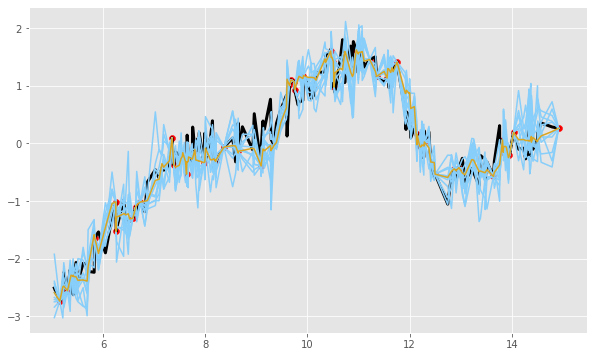

In [59]:
if d:
    idx = int(43)
    plotter.infer_plot2D(decoder,data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 10, context_p = context, order = order)

[15797]
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
[15797]

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[15797]

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are

[19045]

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



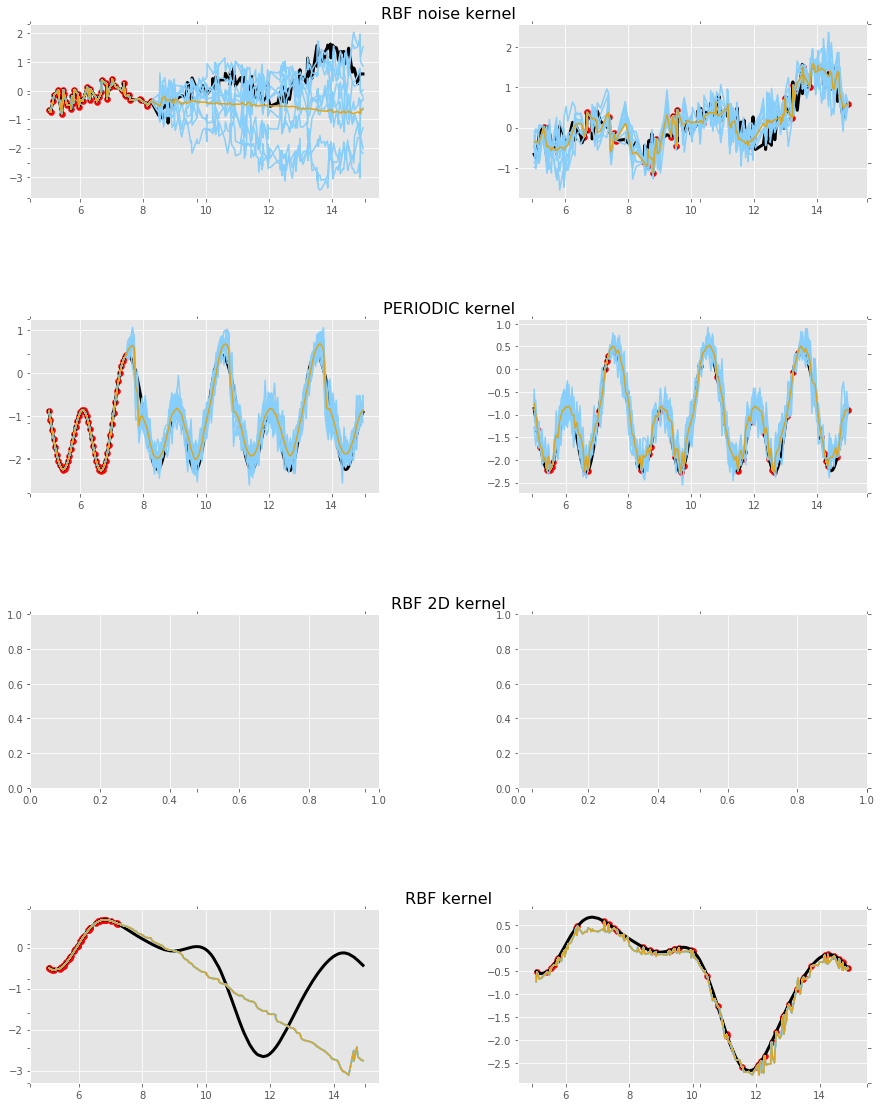

In [7]:
plotter.all_inference()